# The first part of the assignment, IDS 2021-2022
In this Jupyter notebook, please, document your results and the way you have obtained them. You can use the attached yaml file to build Python environment for this assignment. Another option (and the easiest way) is to just use the _Python environment_ provided at the beginning of the course and then use *pip install* to install *p_decision_tree* library. You can find the required yaml file in the folder of this assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Chirag Tutlani - 426454
    
    2. Dilyar Iskan - 384879

    3. Rishabh Saxena - 416770

## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.
 
<font color="red">Note: Your assignment would not be graded if this step is not done. </font>

In [1]:
# Your code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.precision", 8)

seed = 384879
percentage_to_keep = 0.95

df = pd.read_csv("dataset.csv", index_col=0)
sampled_data = df.sample(frac=percentage_to_keep, random_state=seed)

print("Number of Rows before sampling: ", df.shape[0])
print("Number of Rows after sampling: ", sampled_data.shape[0])


Number of Rows before sampling:  940635
Number of Rows after sampling:  893603


## Question 1 - Insights into the Data (20 points):

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. You are more than welcome to provide a deeper analysis and generate more visualizations to understand the data better. Please follow the next two parts.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled. Explain the difference.

In [2]:
# Your code
print("Unique values for CANCELLATION_REASON: ", sampled_data["CANCELLATION_REASON"].unique())
print("Unique values for CANCELLATION_REASON when flight was cancelled: ", sampled_data[sampled_data["CANCELLED"]==1]["CANCELLATION_REASON"].unique())
print("Unique values for CANCELLATION_REASON when flight was not cancelled: ", sampled_data[sampled_data["CANCELLED"]==0]["CANCELLATION_REASON"].unique())

Unique values for CANCELLATION_REASON:  ['N' 'A' 'B' 'C' 'D']
Unique values for CANCELLATION_REASON when flight was cancelled:  ['A' 'B' 'C' 'D']
Unique values for CANCELLATION_REASON when flight was not cancelled:  ['N']


    Your answer:
    
    Actually there are four reasons for cancellation ('A', 'B', 'C' and 'D'). The value 'N' is just a placeholder for CANCELLATION_REASON feature whenever the flight was not cancelled.

#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>. Can you explain the difference? 

In [3]:
# Your code
no_null_data = sampled_data.dropna(axis = 0, how = 'any')

print("Unique values for cancellation reason after removing null values: ", no_null_data["CANCELLATION_REASON"].unique())

Unique values for cancellation reason after removing null values:  ['N']


    Your answer:

    There are features in the dataset that tell us about the flight time (such as Wheels-off, Wheels-on and etc). These features will obviously have null values if the flight was cancelled. So after removing the rows with null values, we only get rows with flights which were not cancelled (and as explained above the placeholder value for uncancelled flight is 'N'). Therefore 'N' is the only unique value for cancellation reason now.

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

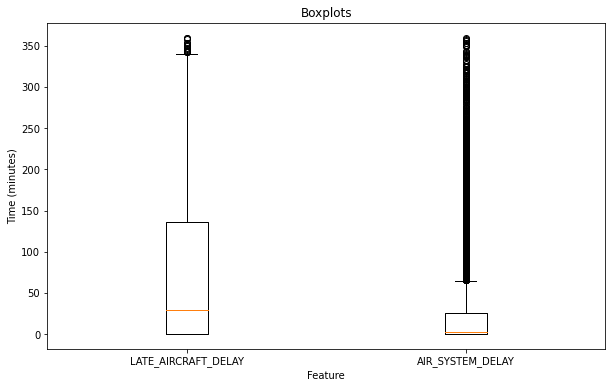

In [4]:
# Your code
ev_data = no_null_data[
    (no_null_data["AIRLINE"] == "EV") &
    (no_null_data["ARRIVAL_DELAY"] >= 2*60) &
    (no_null_data["ARRIVAL_DELAY"] <= 6*60)
]

plt.figure(figsize=(10,6))
boxplot = plt.boxplot([
    ev_data["LATE_AIRCRAFT_DELAY"], 
    ev_data["AIR_SYSTEM_DELAY"]
])
plt.gca().set_xticklabels(["LATE_AIRCRAFT_DELAY", "AIR_SYSTEM_DELAY"])
plt.gca().set_xlabel("Feature")
plt.gca().set_ylabel("Time (minutes)")
plt.gca().set_title("Boxplots")

# since there are no outliers below the lower whisker, therefore removing outliers from the above whisker
min_outlier_late_aircraft = min(boxplot['fliers'][0].get_ydata())
min_outlier_air_system = min(boxplot['fliers'][1].get_ydata())

cleaned_data_late_aircraft = ev_data[ev_data["LATE_AIRCRAFT_DELAY"]<min_outlier_late_aircraft]
cleaned_data_air_system = ev_data[ev_data["AIR_SYSTEM_DELAY"]<min_outlier_air_system]

#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>. 

Interpret the differences for these statistical values between these three datasets. 

In [5]:
# Your code
datasets = [ev_data, cleaned_data_late_aircraft, cleaned_data_air_system]
datasets_names = ['ev_data', 'cleaned_data_late_aircraft', 'cleaned_data_air_system']
medians = []
means = []
modes = []
standard_devitations = []
variances = []

for df in datasets:
    medians = medians + [np.median(df["ARRIVAL_DELAY"])]
    means = means + [np.mean(df["ARRIVAL_DELAY"])]
    modes = modes + [stats.mode(df["ARRIVAL_DELAY"]).mode[0]]
    standard_devitations = standard_devitations + [np.std(df["ARRIVAL_DELAY"])]
    variances = variances + [np.var(df["ARRIVAL_DELAY"])]

pd.DataFrame({
    'dataset': datasets_names,
    'median': medians,
    'mean': means,
    'mode': modes,
    'standard_devation': standard_devitations,
    'variance': variances
})

,dataset,median,mean,mode,standard_devation,variance
0,ev_data,165.0,181.76938835,121.0,55.01885066,3027.07392782
1,cleaned_data_late_aircraft,165.0,181.48690639,121.0,54.62530239,2983.92366088
2,cleaned_data_air_system,164.0,181.17805335,123.0,54.92207544,3016.43437094


    Your answer:

    All the outliers are above the upper-whisker and thus after removing them the median and mode gets marginally less for cleaned_data_late_aircraft and cleaned_data_air_system. 
    

### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

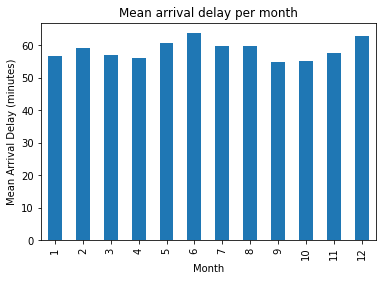

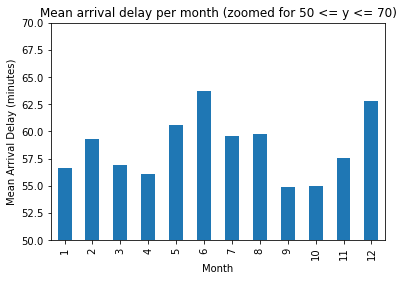

In [6]:
# Your code
# grouping by month and then taking the mean on arrival delay
_ = no_null_data.groupby("MONTH").mean("ARRIVAL_DELAY").reset_index()[["MONTH","ARRIVAL_DELAY"]].plot(x = "MONTH", y = "ARRIVAL_DELAY", kind = "bar", legend = False, xlabel = "Month", ylabel = "Mean Arrival Delay (minutes)", title = "Mean arrival delay per month")

# zooming in on y-axis for better comparison
_ = no_null_data.groupby("MONTH").mean("ARRIVAL_DELAY").reset_index()[["MONTH","ARRIVAL_DELAY"]].plot(x = "MONTH", y = "ARRIVAL_DELAY", kind = "bar", legend = False, xlabel = "Month", ylabel = "Mean Arrival Delay (minutes)", title = "Mean arrival delay per month (zoomed for 50 <= y <= 70)", ylim = (50,70))

    Your answer:

    The mean arrival delay does not changes too much for different months. After zooming in on the y-axis we can see that September (9) and October (10) are the best two months to book a ticket since they have the least arrival delay, and June (6) and December (12) are the worst months to book a ticket since they have the most arrival delay.


#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>. Which month has the minimum and which month has the maximum average weatherdelay? 

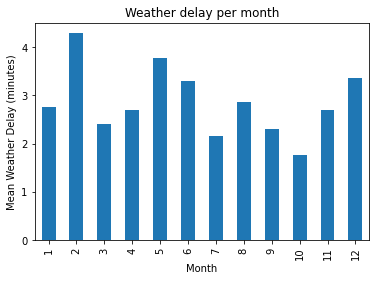

In [7]:
# Your code
# grouping by month and then taking mean on weather delay
_ = no_null_data.groupby("MONTH").mean("WEATHER_DELAY").reset_index()[["MONTH","WEATHER_DELAY"]].plot(x = "MONTH", y = "WEATHER_DELAY", kind = "bar", legend = False, xlabel = "Month", ylabel = "Mean Weather Delay (minutes)", title = "Weather delay per month")

    Your answer:

    October (10) and Feburary (2) has minimum and maximum average weather delay respectively.

#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

    Your answer:
    
    Mean Arrival Delay and Mean Weather Delay per month have almost same distribution with peaks in months 5 and 6, and lowest for months 9 and 10. There is one exception that is for month Feburary (2) which has highest mean weather delay but is not the maxima for mean arrival delay.

#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month. Based on this information, which combination of days of week and months should be avoided to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of week and months.

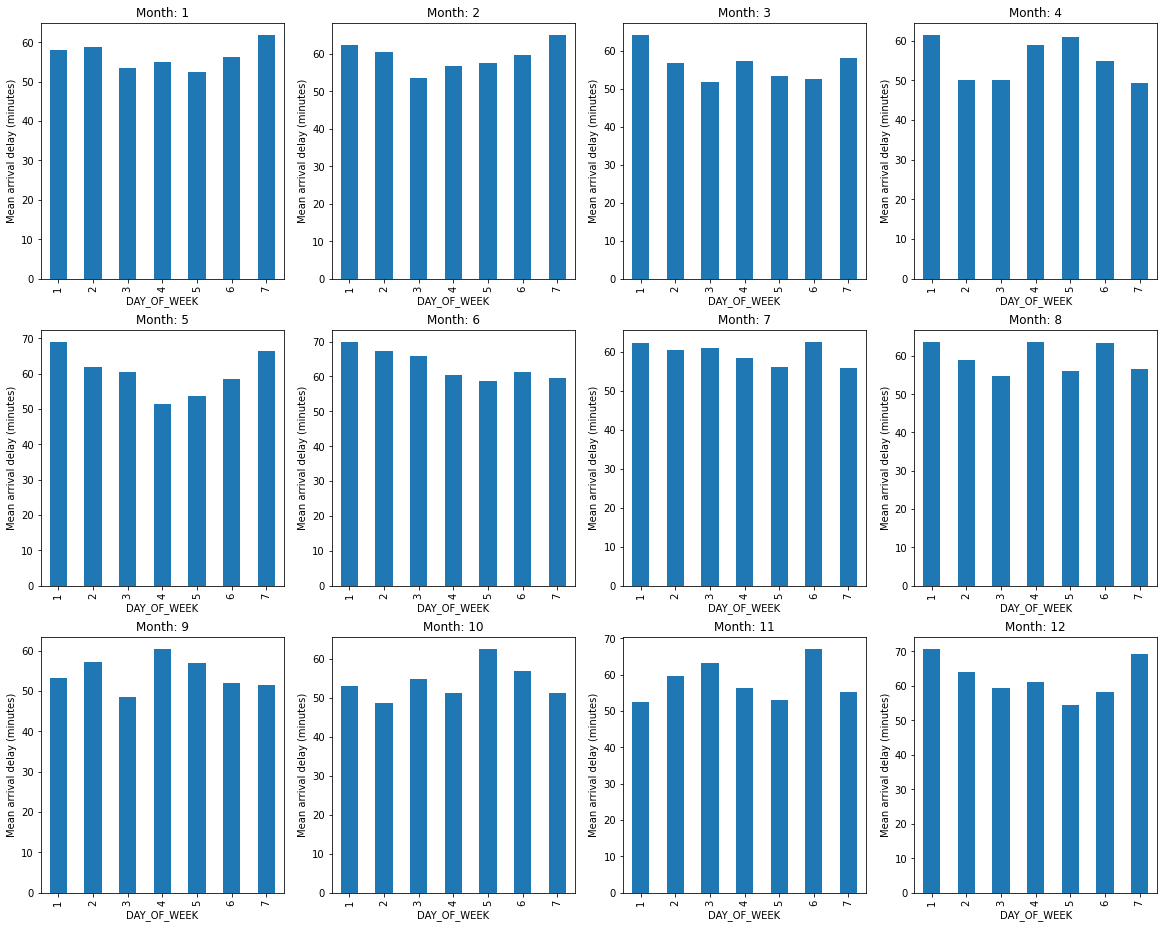

In [8]:
# Your code
fig, axis = plt.subplots(nrows=3, ncols=4, figsize=(20,16))


for (month, month_df) in no_null_data.groupby("MONTH"):
    row_ax = int((month - 1) / 4)
    col_ax = int((month - 1) % 4)
    
    month_df.groupby("DAY_OF_WEEK").mean("ARRIVAL_DELAY").reset_index().plot(x = "DAY_OF_WEEK", y = "ARRIVAL_DELAY", ax=axis[row_ax][col_ax], title = "Month: " + str(month), kind = "bar", legend = False)
    
    axis[row_ax][col_ax].set_ylabel("Mean arrival delay (minutes)")

    Your answer:

    The five worst combinations of month and day of week in terms of mean arrival delay are as follows:

| Month | Day of Week |
| ----- | ----------- |
|   12  |      1      |
|   6   |      1      |
|   12  |      7      |
|   5   |      1      |
|   6   |      2      |

#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.

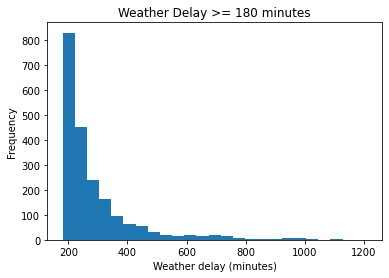

In [9]:
# Your code
# data with atleast 3 hours of weather delay
weather_delay_atleast_3 = no_null_data[no_null_data["WEATHER_DELAY"]>=3*60]

ax = weather_delay_atleast_3["WEATHER_DELAY"].plot(
    bins = 25,
    kind = "hist",
    title = "Weather Delay >= 180 minutes"
)

_ = ax.set_xlabel("Weather delay (minutes)")

#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

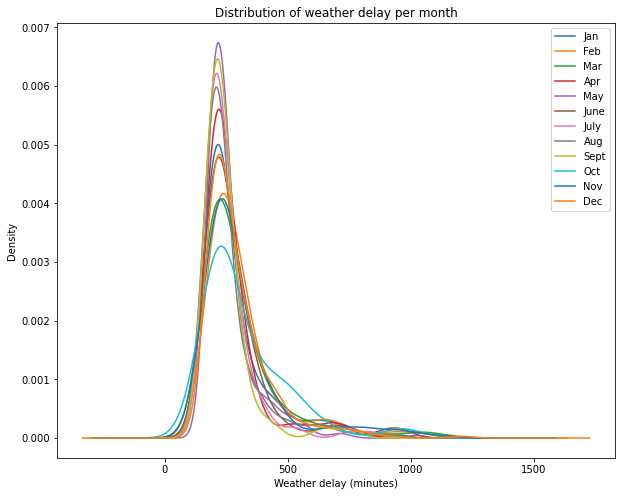

In [10]:
# Your code
# data with more than 3 hours of weather delay
weather_delay_more_than_3 = no_null_data[no_null_data["WEATHER_DELAY"]>3*60]

for (month, month_df) in weather_delay_more_than_3.groupby("MONTH"):
    ax = month_df["WEATHER_DELAY"].plot.kde(figsize=(10,8))

ax.set_xlabel("Weather delay (minutes)")
ax.set_title("Distribution of weather delay per month")
_ = ax.legend(["Jan","Feb","Mar","Apr","May","June","July","Aug","Sept","Oct","Nov","Dec"])

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

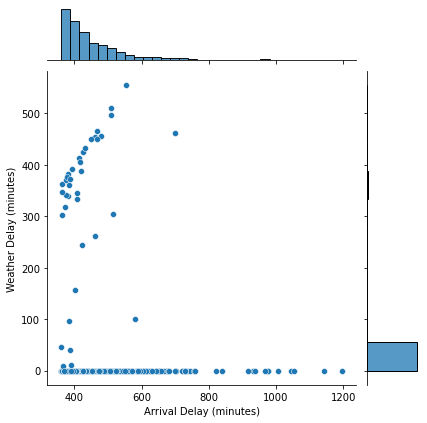

In [11]:
# Your code
arrival_delay_more_than_6 = no_null_data[no_null_data["ARRIVAL_DELAY"]>6*60]
arrival_delay_more_than_6_ev_vx = arrival_delay_more_than_6[
    (arrival_delay_more_than_6["AIRLINE"] == 'EV') |
    (arrival_delay_more_than_6["AIRLINE"] == "VX")
]

jointplot = sns.jointplot(arrival_delay_more_than_6_ev_vx["ARRIVAL_DELAY"], y=arrival_delay_more_than_6_ev_vx["WEATHER_DELAY"], kind="scatter", height=6)

# setting axis labels
_ = jointplot.set_axis_labels(xlabel = "Arrival Delay (minutes)", ylabel = "Weather Delay (minutes)")

       Your answer:

       Both of the distributions are unimodal and right-skewed. The distribution of weather delay has very small standard deviation whereas the standard deviation for arrival delay is more as we can also observe arrival delay of more than 8 hours (480 minutes) number of times.


## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [12]:
# Your code
flights_UA = no_null_data[
    (no_null_data["AIRLINE"] == "UA") &
    (no_null_data["ARRIVAL_DELAY"] > 0)
]

# constructing new feature "DELAY" based on "ARRIVAL_DELAY"
flights_UA.loc[:,"DELAY"] = np.where(flights_UA["ARRIVAL_DELAY"]<=45, "acceptable_delay", "unacceptable_delay")

# finding half distance
min_distance = flights_UA["DISTANCE"].min()
max_distance = flights_UA["DISTANCE"].max()
mid_distance = (max_distance - min_distance)/2

# constructing new feature "DISTANCE_CATEGORY" based on "DISTANCE"
flights_UA.loc[:,"DISTANCE_CATEGORY"] = np.where(flights_UA["DISTANCE"]<=mid_distance, "short", "long")

#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

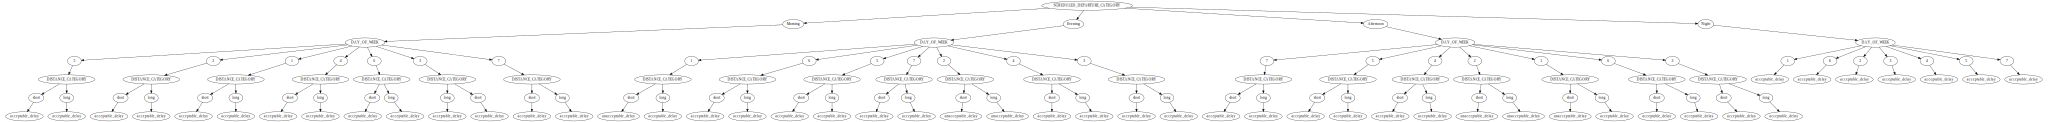

In [13]:
# Your code

from p_decision_tree.DecisionTree import DecisionTree

descriptive_features = ["SCHEDULED_DEPARTURE_CATEGORY", "DISTANCE_CATEGORY", "DAY_OF_WEEK"]

descriptive_data = flights_UA[descriptive_features]
for col in descriptive_data.columns:
    descriptive_data[col] = descriptive_data[col].astype(str)

descriptive_data = descriptive_data.values.tolist()
data_label = flights_UA["DELAY"].astype(str).values.tolist()

decision_tree = DecisionTree(descriptive_data, descriptive_features, data_label, "entropy")
decision_tree.id3(0, 1000)

dot = decision_tree.print_visualTree(render=True)
_ = display(dot)


#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

    Your answer:

    The best feature for splitting the tree in the second round of ID3 is "DAY_OF_WEEK"
    

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

    Your answer:

    The two rules where it is prone to have more than 45 minutes delay ie "unacceptable_delay", are as follows:
    1. If the departure is scheduled (SCHEDULED_DEPARTURE_CATEGORY) for evening on first day of week (DAY_OF_WEEK = 1) and distance is categorised as short (DISTANCE_CATEGORY = short)
    2. If the departure is scheduled (SCHEDULED_DEPARTURE_CATEGORY) for evening on second day of week (DAY_OF_WEEK = 2) and distance is categorised as long (DISTANCE_CATEGORY = long)


## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [2]:
# Your code
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib

from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

df_3 = pd.read_csv("flights_classifying.csv", index_col=0)

Randomly order the data points using one of the group member's students as the random state.

In [3]:
# Your code
df_3 = shuffle(df_3, random_state=416770)

### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [4]:
# Your code

df_3 = df_3[df_3.CANCELLED != 1]
target_feature = df_3['REIMBURSMENT']

#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

In [5]:
# Your code
DestinationAirport = pd.get_dummies(df_3.DESTINATION_AIRPORT, prefix='DESTINATION_AIRPORT')   #Destination Airport Feature (The traveller would know their destination)
OriginAirport = pd.get_dummies(df_3.ORIGIN_AIRPORT, prefix='ORIGIN_AIRPORT')    #Origin Airport Feature (The traveller would know their origin airport)
Airline = pd.get_dummies(df_3.AIRLINE, prefix='AIRLINE')    #Airline Feature (The traveller would know their airline)
ScheduledDepartureCategory = pd.get_dummies(df_3.SCHEDULED_DEPARTURE_CATEGORY, prefix='SCHEDULED_DEPARTURE_CATEGORY')    #Scheduled Departure Category Feature (The traveller would know their departure category)
DayYearly = df_3['DAY_YEARLY'] / 365   #Normalized day yearly (The traveller would know their yearly day)
ScheduledDeparture = (np.floor( df_3['SCHEDULED_DEPARTURE'] / 100 ) * 3600 + df_3['SCHEDULED_DEPARTURE'] % 100) / 86400  #Normalized Scheduled Departure (The traveller would know their scheduled departure)
ScheduledArrival = (np.floor( df_3['SCHEDULED_ARRIVAL'] / 100 ) * 3600 + df_3['SCHEDULED_ARRIVAL'] % 100) / 86400  #Normalized Scheduled Arrival (The traveller would know their scheduled arrival)

DescriptiveOneHot = pd.concat([DestinationAirport, OriginAirport, Airline, ScheduledDepartureCategory, DayYearly, ScheduledArrival, ScheduledDeparture], axis=1)

Split your data into training and testing data, with 85% of the dataset going to testing data.

In [6]:
# Your code
Split = int(len(DescriptiveOneHot)*0.15)  #Splitting at 15% and 85%

#Descriptive Feature Split
TrainDescriptiveFeatures = DescriptiveOneHot.iloc[:Split]
TestDescriptiveFeatures = DescriptiveOneHot.iloc[Split:]

TrainTargetFeatures = target_feature.iloc[:Split]
TestTargetFeatures = target_feature.iloc[Split:]

#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

In [7]:
#you may put code here, if necessary

def score(target_feature_test, target_feature_pred):    #Function to store scores

    target_label = ['REIMBURSMENT']

    #Regression Specific Scores
    RegressionScoreMSE = mean_squared_error(target_feature_test, target_feature_pred)  #Mean Squared Error between the predicted values and the true values
    RegressionScoreMAE = mean_absolute_error(target_feature_test, target_feature_pred)  #Mean Absolute Error between the predicted values and the true values

    #Classification Specific Scores
    PrecisionScore = precision_score(target_feature_test, target_feature_pred)   #Precision Score for the classifier
    RecallScore = recall_score(target_feature_test, target_feature_pred)   #Recall Score for the classifier
    F1Score = f1_score(target_feature_test, target_feature_pred)   #F1 Score for the classifier

    #Generic Score
    AccuracyScore = accuracy_score(target_feature_test, target_feature_pred)  #Accuracy for the classifier

    scores_label = ['Regression MSE', 'Regression MAE', 'Precision', 'Recall', 'F1', 'Accuracy']
    scores = pd.DataFrame([RegressionScoreMSE, RegressionScoreMAE, PrecisionScore, RecallScore, F1Score, AccuracyScore], scores_label, ['Score Value'])
    
    print("Classification Report: \n")
    print(classification_report(target_feature_test, target_feature_pred))

    return scores

    Your answer:
    
    For Regression based models (i.e. Logistic Regression and SVM), we take Mean Squared Error and Mean Absolute Error as the evalutation metric to compare the difference between the predicted data and the actual true values. This is done in order to see whether the regression models are performing well when it comes to the difference between the predictions and true values.

    For both Regression and Classification based models (i.e. Logistic Regression, SVM and Neural Networks), we take Precision, which is the True Positives / (True Positives + True Negatives) since it provides us with how well we can predict a class, Recall, which is True Positive / (True Positives + False Negatives) which gives us how well the model can predict the positive classes out of all predicted positive values, and F1 score which is a combination of Precision and Recall.  

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

In [8]:
# Your code
BaselineClassifier = DummyClassifier(strategy = "stratified")
BaselineClassifier.fit(TrainDescriptiveFeatures, TrainTargetFeatures)
TestTargetFeatures_Pred = BaselineClassifier.predict(TestDescriptiveFeatures)

BaselineValues = score(TestTargetFeatures, TestTargetFeatures_Pred)

Classification Report: 

              precision    recall  f1-score   support

           0       0.93      0.92      0.93    414823
           1       0.07      0.07      0.07     31924

    accuracy                           0.86    446747
   macro avg       0.50      0.50      0.50    446747
weighted avg       0.87      0.86      0.87    446747



    Your answer:
    
    We use the DummyClassifier function as the baseline model because it uses simples rules (i.e. basic rules to predict the class of a given input, as specified by scikit-learn library). 
    

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


#### a) Regression:
Train, finetune and evaluate a regression model.

In [9]:
# Your code
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.01, 0.1, 1],'penalty': ['l2', 'l1']}
grid = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='ovr', class_weight='balanced'),param_grid, cv=2, scoring='f1')
grid.fit(TrainDescriptiveFeatures, TrainTargetFeatures)

flightLogisticReg = LogisticRegression(random_state=416770, C=grid.best_params_['C'], penalty = grid.best_params_['penalty'], solver = 'liblinear', class_weight = 'balanced')
flightLogisticReg.fit(TrainDescriptiveFeatures, TrainTargetFeatures)
TestTargetFeatures_Pred = flightLogisticReg.predict(TestDescriptiveFeatures)

RegScore = score(TestTargetFeatures, TestTargetFeatures_Pred)
print("Regression Specific Scores: \n")
print(RegScore.iloc[:2,:])


Classification Report: 

              precision    recall  f1-score   support

           0       0.95      0.58      0.72    414823
           1       0.10      0.59      0.17     31924

    accuracy                           0.58    446747
   macro avg       0.52      0.59      0.45    446747
weighted avg       0.89      0.58      0.68    446747

Regression Specific Scores: 

                Score Value
Regression MSE     0.415732
Regression MAE     0.415732


#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [13]:
# Your code
from sklearn.svm import SVC

size = 10000 
TrainDescriptiveFeatures_less = TrainDescriptiveFeatures.iloc[:size]
TrainTargetFeatures_less = TrainTargetFeatures.iloc[:size]

flightSVM = SVC(C=10, gamma = 0.0001, kernel = 'linear', class_weight = 'balanced')
flightSVM.fit(TrainDescriptiveFeatures_less, TrainTargetFeatures_less)
TestTargetFeatures_Pred = flightSVM.predict(TestDescriptiveFeatures)

SVMScore = score(TestTargetFeatures, TestTargetFeatures_Pred)
print("Regression Specific Scores: \n")
print(SVMScore.iloc[:2,:])

Classification Report: 

              precision    recall  f1-score   support

           0       0.94      0.59      0.72    414823
           1       0.09      0.51      0.15     31924

    accuracy                           0.58    446747
   macro avg       0.51      0.55      0.44    446747
weighted avg       0.88      0.58      0.68    446747

Regression Specific Scores: 

                Score Value
Regression MSE     0.418199
Regression MAE     0.418199


#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [12]:
# Your code
from sklearn.neural_network import MLPClassifier

param_grid = {'solver': ['sgd', 'lbfgs'],'learning_rate': ['constant', 'invscaling', 'adaptive']}
grid = GridSearchCV(MLPClassifier(max_iter=5000, activation='identity'), param_grid, cv=2, scoring='f1')
grid.fit(TrainDescriptiveFeatures, TrainTargetFeatures)

flightNN = MLPClassifier(activation = 'relu', solver=grid.best_params_['solver'], learning_rate = grid.best_params_['learning_rate'], alpha=1e-5,hidden_layer_sizes=(1000, 1000, 700, 100), random_state=416550)
flightNN.fit(TrainDescriptiveFeatures, TrainTargetFeatures)
TestTargetFeatures_Pred = flightNN.predict(TestDescriptiveFeatures)

NNScore = score(TestTargetFeatures, TestTargetFeatures_Pred)

C:\Users\cjbla\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Classification Report: 

              precision    recall  f1-score   support

           0       0.93      0.96      0.95    414823
           1       0.11      0.06      0.08     31924

    accuracy                           0.90    446747
   macro avg       0.52      0.51      0.51    446747
weighted avg       0.87      0.90      0.88    446747



### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

In [14]:
# your code if needed
print("Final Classification Report for class 1 (We get reimbursement): \n")

FinalScore = pd.concat([RegScore, SVMScore, NNScore, BaselineValues], axis = 1)
FinalScore.columns.values[0] = "Regression Score"
FinalScore.columns.values[1] = "SVM Score"
FinalScore.columns.values[2] = "Neural Network Score"
FinalScore.columns.values[3] = "Baseline Score"
FinalScore.iloc[0,2] = np.NaN
FinalScore.iloc[1,2] = np.NaN

print(FinalScore)
print("\n")

print("Probability of breakeven = (For Reimbursement = 1) True Positives / (All Positives) = Precision: \n")
print("With Regression Score: " + str(FinalScore.iloc[2,0]) + " and flight price for which it is profitable = " + str(FinalScore.iloc[2,0]*150) + "\n")
print("With SVM Score: " + str(FinalScore.iloc[2,1]) + " and flight price for which it is profitable = " + str(FinalScore.iloc[2,1]*150) + "\n")
print("With Neural Network Score: " + str(FinalScore.iloc[2,2]) + " and flight price for which it is profitable = " + str(FinalScore.iloc[2,2]*150) + "\n")

Final Classification Report for class 1 (We get reimbursement): 

                Regression Score  SVM Score  Neural Network Score  \
Regression MSE          0.415732   0.418199                   NaN   
Regression MAE          0.415732   0.418199                   NaN   
Precision               0.098633   0.086618              0.108757   
Recall                  0.591968   0.508364              0.062398   
F1                      0.169092   0.148016              0.079299   
Accuracy                0.584268   0.581801              0.896460   

                Baseline Score  
Regression MSE        0.136229  
Regression MAE        0.136229  
Precision             0.068377  
Recall                0.071796  
F1                    0.070045  
Accuracy              0.863771  


Probability of breakeven = (For Reimbursement = 1) True Positives / (All Positives) = Precision: 

With Regression Score: 0.09863308263613067 and flight price for which it is profitable = 14.794962395419601

With SVM 

    Your answer:

    We see that with increasing complexity of the model, the accuracy of predicting 1 increases. The precision remains almost the same, since the data is heavily imbalanced. Compared to baseline, we have better values, except for the SVM. Only the Neural Network has better accuracy than the baseline. 

    For the regression and SVM, we have the MSE and MAE score which are not very good, which is worse than the baseline values. 

    The maximum value for which our model is profitable is 16.

    We are able to increase the likelihood of getting a delayed flight, but only slightly.

## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [25]:
# Your code
#WARNING: you have used ARRIVAL_DELAY make sure that there is no LATE_ARRIVAL_DELAY
indecies = no_null_data[
    (no_null_data["WEATHER_DELAY"] >= 600) |
    (no_null_data["LATE_AIRCRAFT_DELAY"] >= 600)].index
print("no_null_data shape before removing the flights: ", no_null_data.shape)

no_null_data.drop(indecies, inplace = True)
print("no_null_data shape after removing the flights: ", no_null_data.shape)

no_null_data["AIR_TIME_DELAY"] = no_null_data["ELAPSED_TIME"] - no_null_data["SCHEDULED_TIME"]

print(no_null_data.shape)
clustering_dataset = no_null_data.copy()
print("shape of clustering_dataset: ", clustering_dataset.shape)
print(clustering_dataset[["AIR_TIME_DELAY", "SCHEDULED_TIME",  "ELAPSED_TIME"]].head(10))

#All the columns are readable
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
clustering_dataset.head(10)

no_null_data shape before removing the flights:  (808317, 35)
no_null_data shape after removing the flights:  (808086, 35)
(808086, 36)
shape of clustering_dataset:  (808086, 36)
        AIR_TIME_DELAY  SCHEDULED_TIME  ELAPSED_TIME
314459             3.0            45.0          48.0
770133            19.0           307.0         326.0
164463            23.0            94.0         117.0
530205           -14.0           214.0         200.0
156369            23.0            80.0         103.0
305870            -6.0            84.0          78.0
479237            11.0           285.0         296.0
661806            -6.0           145.0         139.0
271153            -8.0           120.0         112.0
208592           -12.0           160.0         148.0


,Unnamed: 0.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY,AIR_TIME_DELAY
314459,657249,2015,10,11,7,HA,319,N483HA,OGG,LIH,1450,1502.0,12.0,7.0,1509.0,45.0,48.0,36.0,201,1545.0,5.0,1535,1550.0,15.0,0,0,N,0.0,0.0,15.0,0.0,0.0,284,40,Afternoon,3.0
770133,591367,2015,5,7,4,US,686,N150UW,PHL,PHX,1350,1350.0,0.0,24.0,1414.0,307.0,326.0,296.0,2075,1610.0,6.0,1557,1616.0,19.0,0,0,N,19.0,0.0,0.0,0.0,0.0,127,18,Afternoon,19.0
164463,673626,2015,6,28,7,US,1905,N586UW,CLT,MCO,925,937.0,12.0,35.0,1012.0,94.0,117.0,73.0,468,1125.0,9.0,1059,1134.0,35.0,0,0,N,23.0,0.0,0.0,12.0,0.0,179,25,Morning,23.0
530205,861017,2015,10,30,5,UA,1150,N24211,IAH,SAN,900,940.0,40.0,22.0,1002.0,214.0,200.0,172.0,1303,1054.0,6.0,1034,1100.0,26.0,0,0,N,0.0,0.0,26.0,0.0,0.0,303,43,Morning,-14.0
156369,448964,2015,11,11,3,DL,678,N838DN,DTW,ORD,2200,34.0,154.0,12.0,46.0,80.0,103.0,81.0,235,107.0,10.0,2220,117.0,177.0,0,0,N,177.0,0.0,0.0,0.0,0.0,315,45,Evening,23.0
305870,376756,2015,3,2,1,US,736,N547UW,LAX,PHX,1750,1930.0,100.0,23.0,1953.0,84.0,78.0,52.0,370,2145.0,3.0,2014,2148.0,94.0,0,0,N,0.0,0.0,0.0,94.0,0.0,61,8,Afternoon,-6.0
479237,169223,2015,11,30,1,WN,2024,N287WN,BNA,LAX,1115,1126.0,11.0,9.0,1135.0,285.0,296.0,278.0,1797,1413.0,9.0,1400,1422.0,22.0,0,0,N,11.0,0.0,9.0,2.0,0.0,334,47,Morning,11.0
661806,912275,2015,6,24,3,WN,637,N254WN,STL,LGA,1920,2009.0,49.0,10.0,2019.0,145.0,139.0,106.0,888,2305.0,23.0,2245,2328.0,43.0,0,0,N,0.0,0.0,25.0,18.0,0.0,175,25,Evening,-6.0
271153,915021,2015,3,6,5,WN,891,N736SA,MDW,LGA,1155,1339.0,104.0,14.0,1353.0,120.0,112.0,94.0,725,1627.0,4.0,1455,1631.0,96.0,0,0,N,0.0,0.0,0.0,9.0,87.0,65,9,Morning,-8.0
208592,397592,2015,1,5,1,AA,1425,N496AA,DFW,IAD,1510,1624.0,74.0,9.0,1633.0,160.0,148.0,133.0,1172,1946.0,6.0,1850,1952.0,62.0,0,0,N,0.0,0.0,23.0,39.0,0.0,5,0,Afternoon,-12.0


    Your answer:

    EXPLENATION OF POSITIVE AND NEGATIVE VALUES IN AIR_TIME_DELAY: The positive values mean the flight has been longer than it was planned (scheduled). The negative values  mean the flight has taken shorter amout of time than it was planned (scheduled).

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

In [26]:
# Your code
import sklearn.cluster

data = pd.DataFrame(clustering_dataset, columns=['AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'])

kmeans = sklearn.cluster.KMeans(n_clusters=5, init="random", n_init=5)
y = kmeans.fit_predict(data[['AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY']])
centroids = kmeans.cluster_centers_
mapcentroids = {0:"c1", 1:"c2", 2:"c3", 3:"c4", 4:"c5"}
ydic = [mapcentroids[i] for i in y ]
data['cluster_int'] = y
data['cluster'] = ydic

(suss, _) = data.shape
(num_c1, _) = data[data['cluster_int']==0].shape
(num_c2, _) = data[data['cluster_int']==1].shape
(num_c3, _) = data[data['cluster_int']==2].shape
(num_c4, _) = data[data['cluster_int']==3].shape
(num_c5, _) = data[data['cluster_int']==4].shape

print("The centroids table:\n")
table2 = pd.DataFrame(columns=["CLUSTER", "AIR_TIME_DELAY", "WEATHER_DELAY", "LATE_AIRCRAFT_DELAY", "NUMBER_OF_SAMPLES"],
                    data=[["c1", centroids[0,0], centroids[0,1], centroids[0,2], num_c1],
                          ["c2", centroids[1,0],centroids[1,1],centroids[1,2], num_c2],
                          ["c3", centroids[2,0],centroids[2,1],centroids[2,2], num_c3],
                         ["c4",centroids[3,0],centroids[3,1],centroids[3,2], num_c4],
                         ["c5",centroids[4,0],centroids[4,1],centroids[4,2], num_c5]])
print(table2)

The centroids table:

  CLUSTER  AIR_TIME_DELAY  WEATHER_DELAY  LATE_AIRCRAFT_DELAY  \
0      c1     -3.40173101     1.12213578          71.38854394   
1      c2     -4.14476564     2.41663522         190.22748887   
2      c3     -5.10460758     1.22879849          10.41368951   
3      c4     27.25905391     1.39012925           2.48755725   
4      c5      8.84774459   149.48022736           8.45712904   

   NUMBER_OF_SAMPLES  
0             121872  
1              26489  
2             435612  
3             215844  
4               8269  


    Your answer:

    Kmeans is an optimization problem. The function we optimize has multiple local minima. We use diffrent centroid seeds to allow K-Means to optimize the function, and to avoid same local minima.
    

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

None

None

None

None

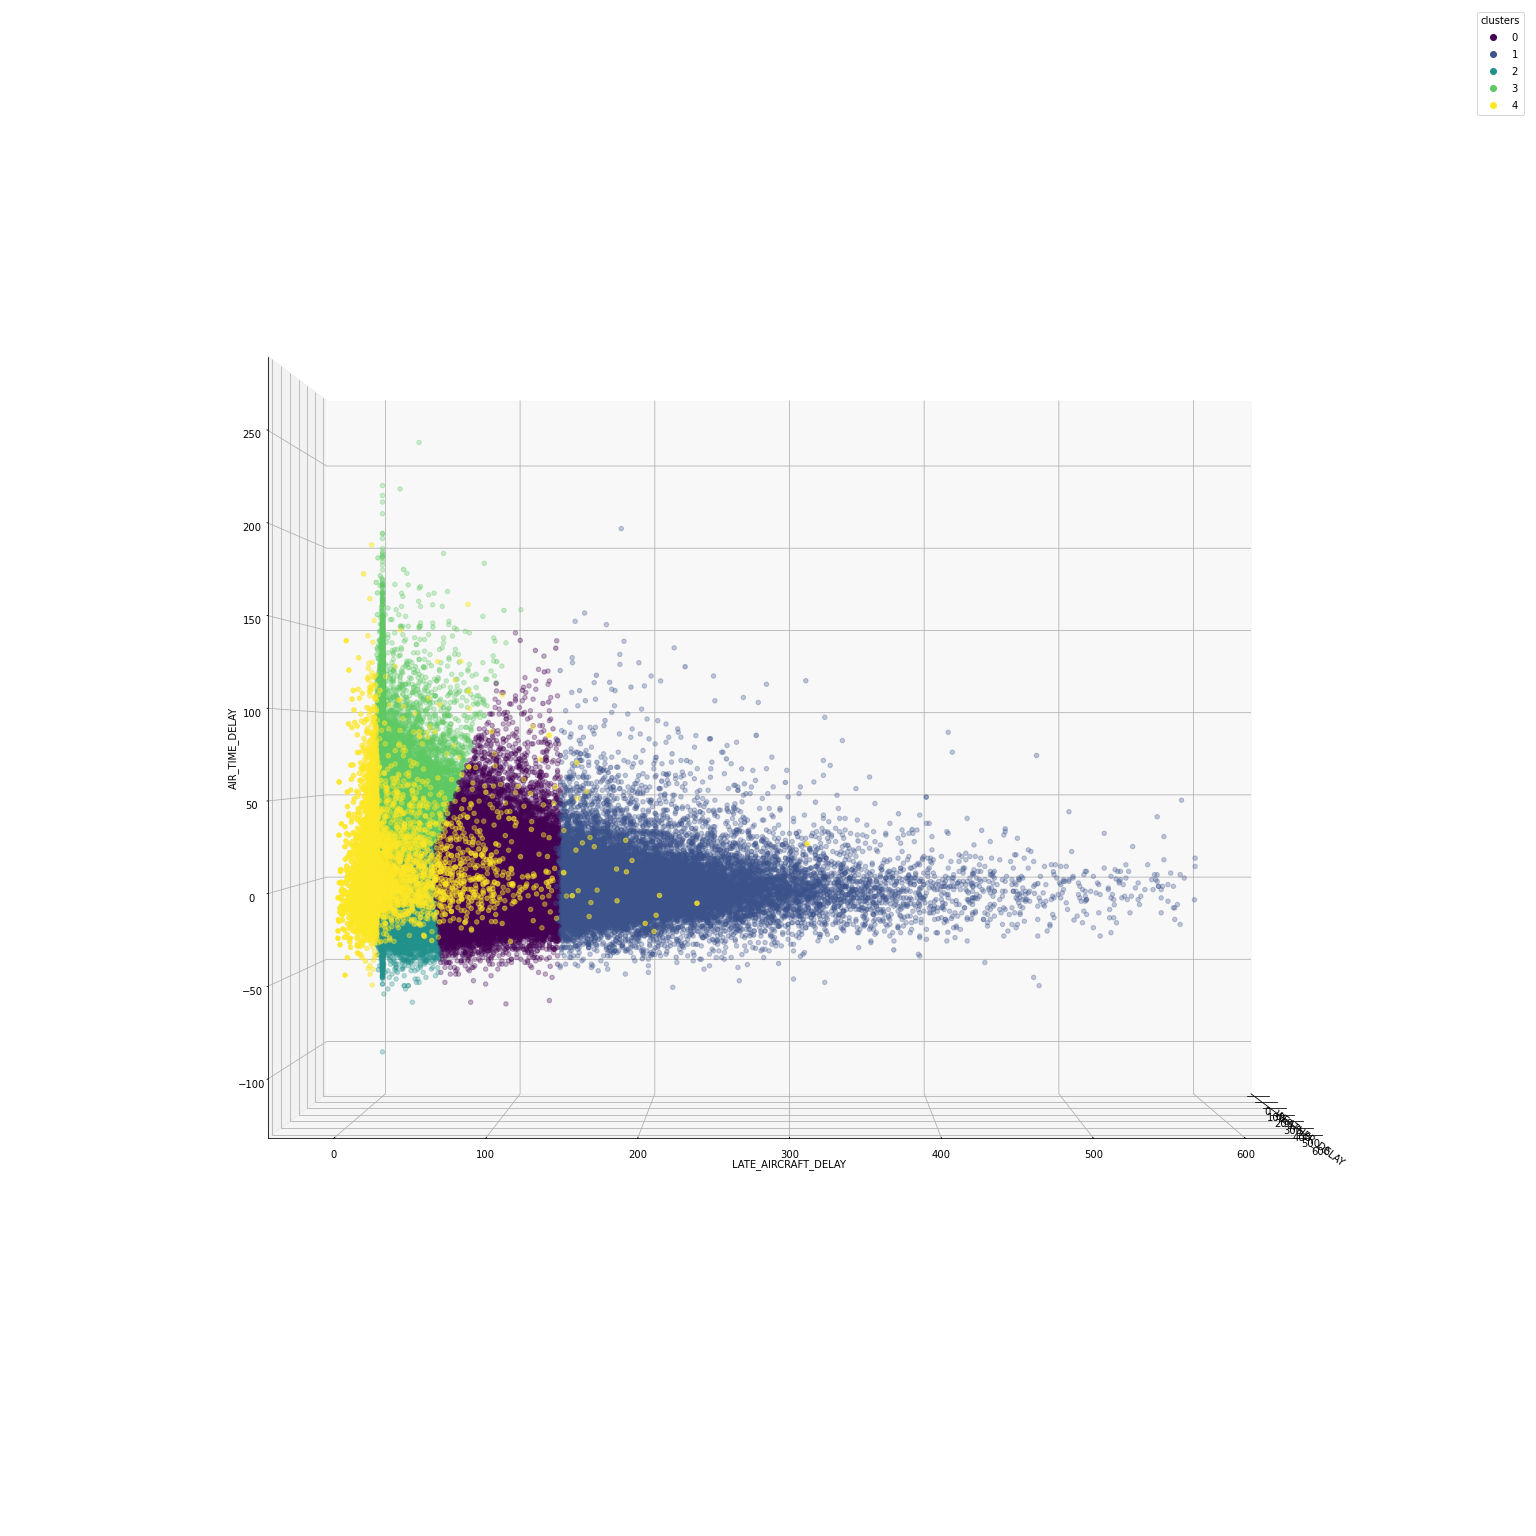

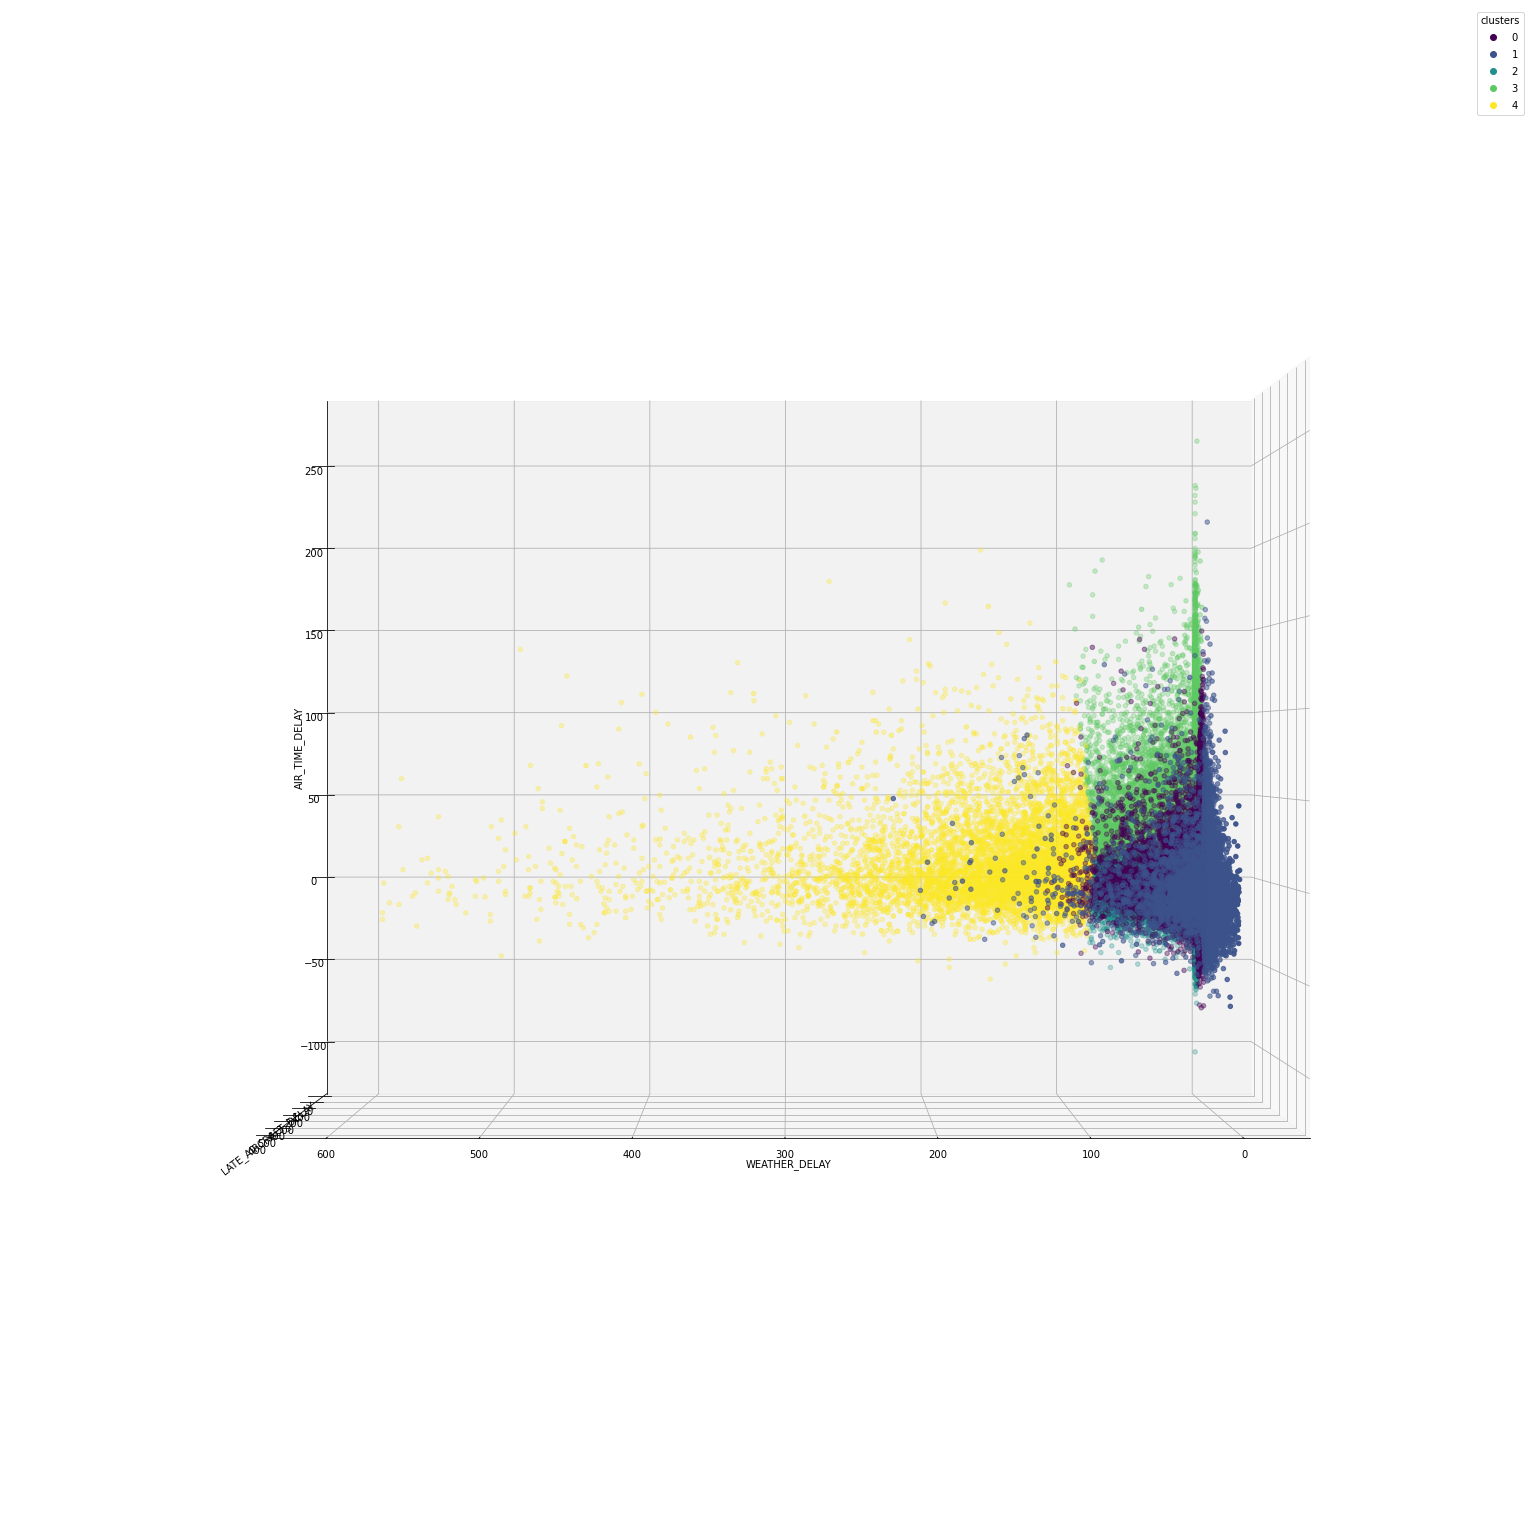

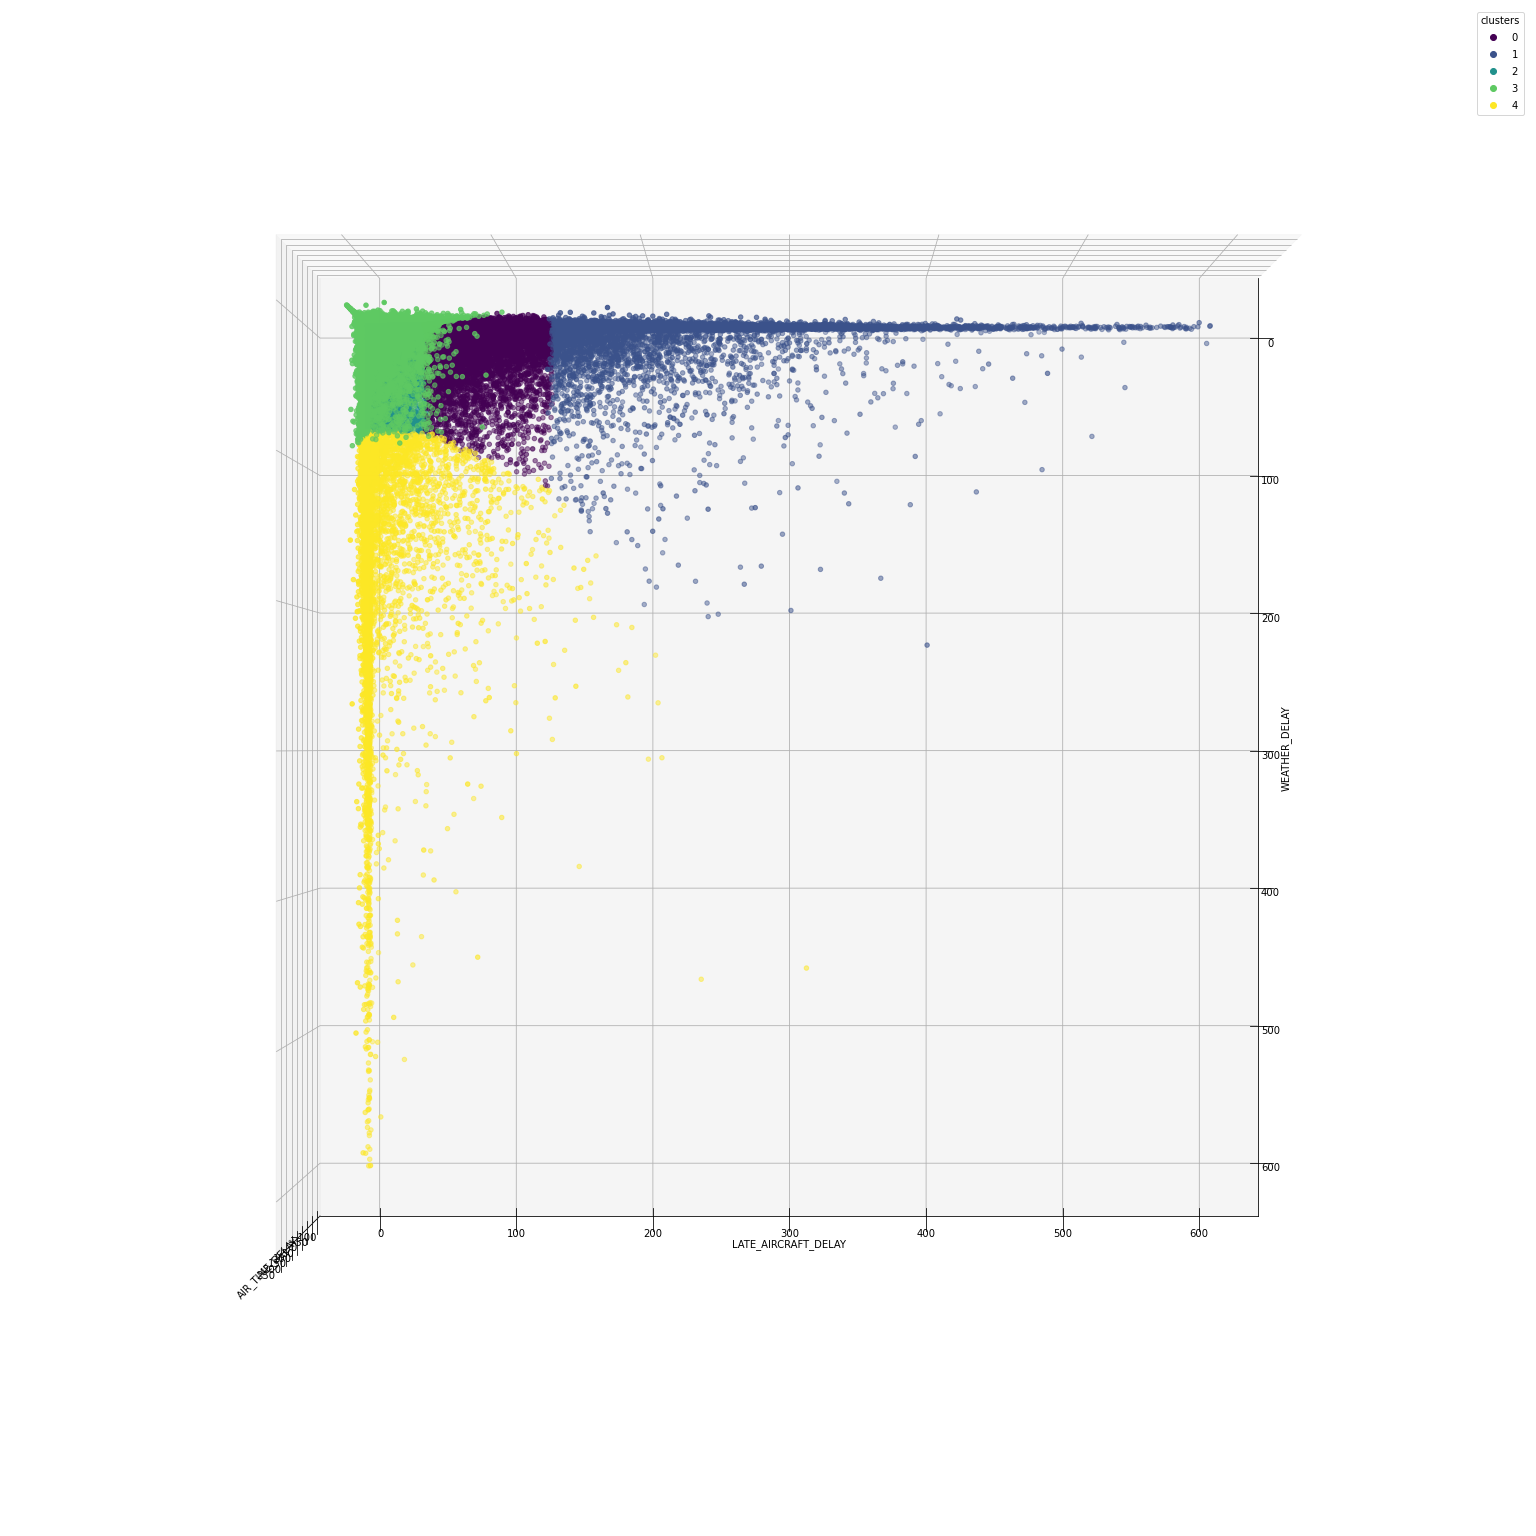

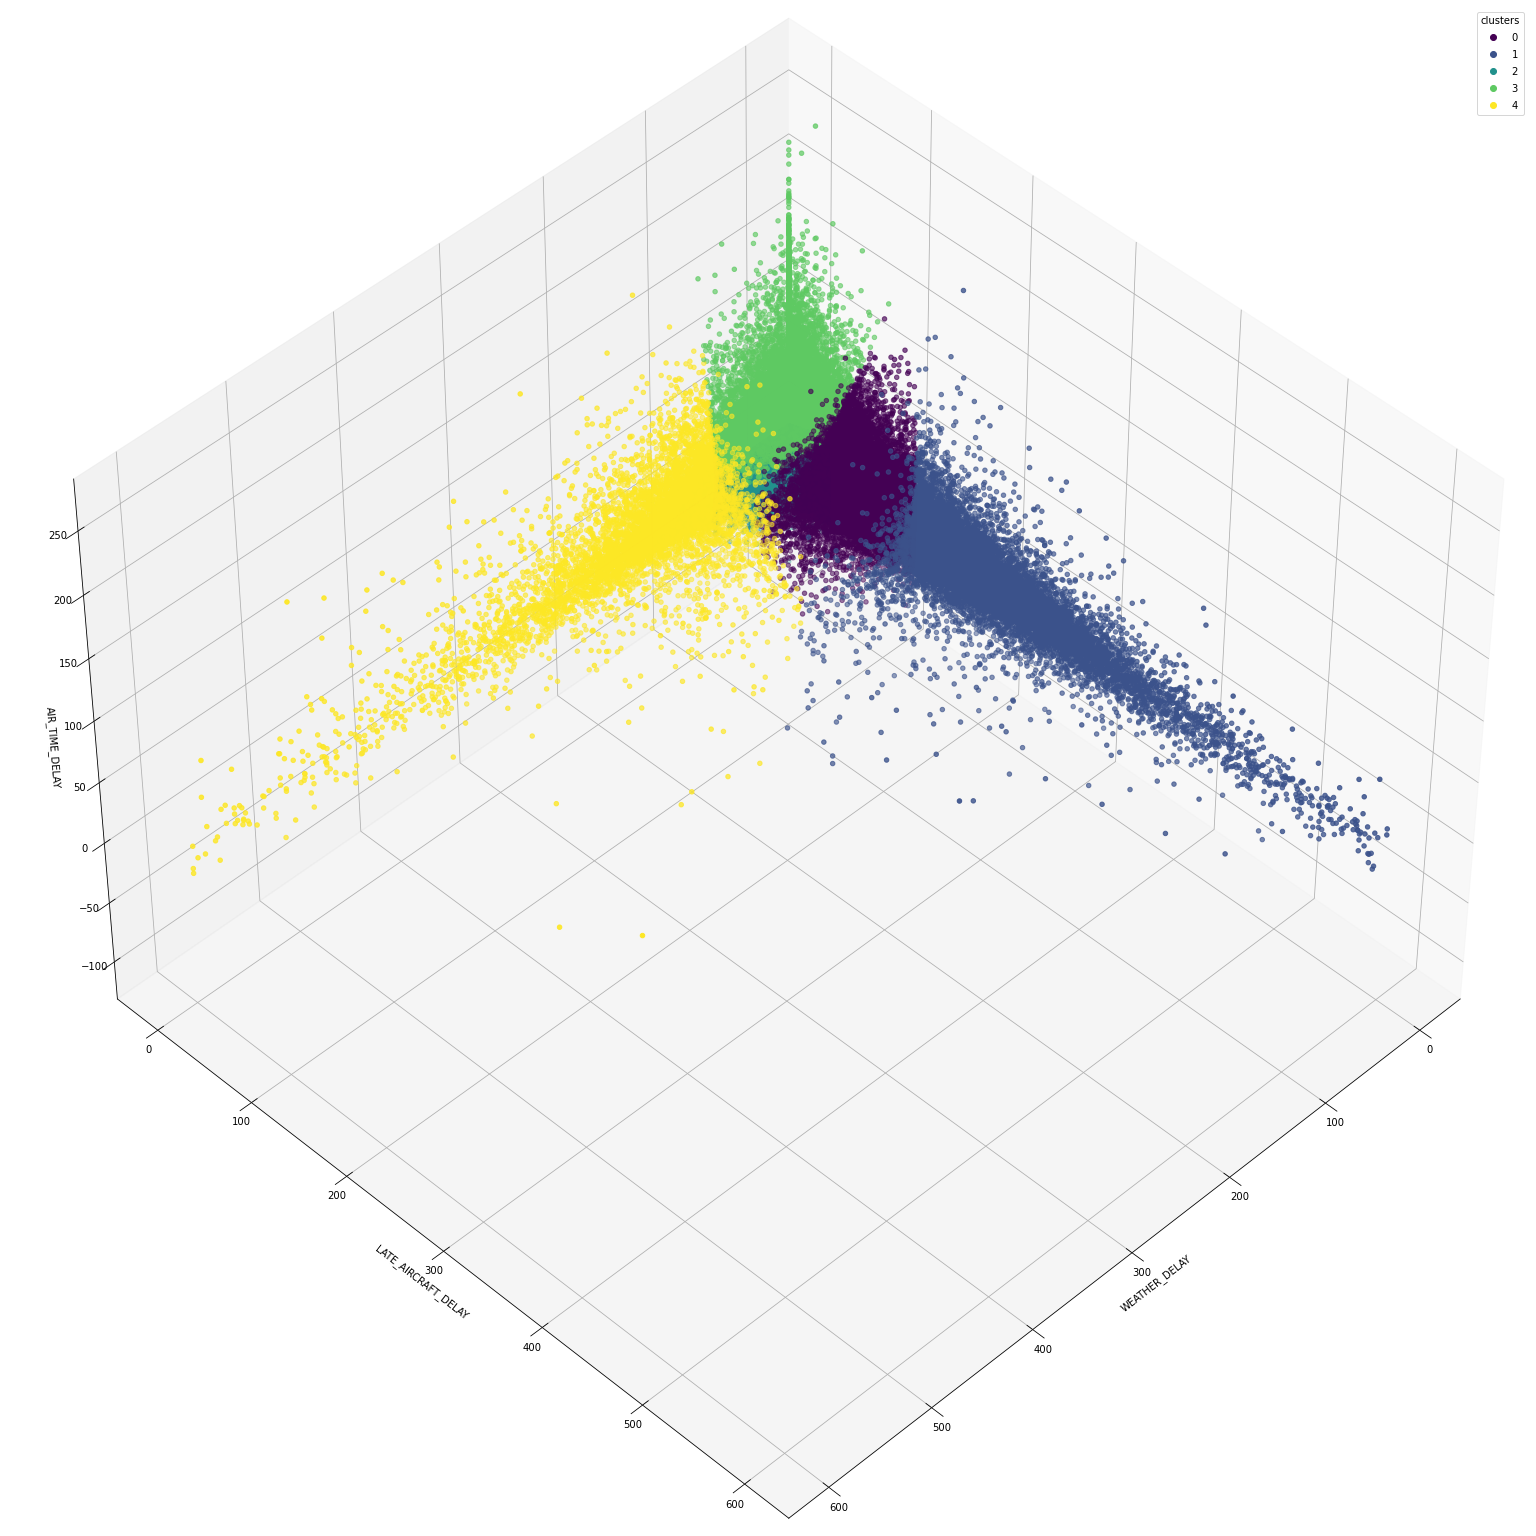

In [27]:
# Your code
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot(elev, azim):

    fig = plt.figure(figsize=(28,28))
    ax = fig.add_subplot( projection='3d')
    ax.set_xlabel('WEATHER_DELAY')
    ax.set_ylabel('LATE_AIRCRAFT_DELAY')
    ax.set_zlabel('AIR_TIME_DELAY')
    scatter = ax.scatter(xs=data['WEATHER_DELAY'], ys=data['LATE_AIRCRAFT_DELAY'], zs=data['AIR_TIME_DELAY'], c=data['cluster_int'])
    ax.legend(*scatter.legend_elements(), title='clusters')
    ax.view_init(elev, azim)

display(plot(0,0))
display(plot(0,90))
display(plot(90,0))
display(plot(45,45))

    Your answer:

    The cluster c5 (4) contains the data points with high late aircraft delay, relativly low weather delay and mostly concentrated around 0 min air time delay.
    
     The cluster c4 (3) contains moderate air time delay, and weather delay and it has highest air time delay.
      The cluster c3 (2) contains mostly data points around -50 min air time delay.
       The cluster c2 (1) contains the data points with low late aircraft delay and relativly high weather delay.
        The cluster c1 (0) cotains data points mostly around 100 min air craft delay.
    